# <center> <h1> 📉 🧑‍💻 📈

#  <center> Logistic regression is a statistical model used to predict the probability of an event occurring by comparing it with a logistic curve. This regression gives the answer as the probability of a binary event (1 or 0).



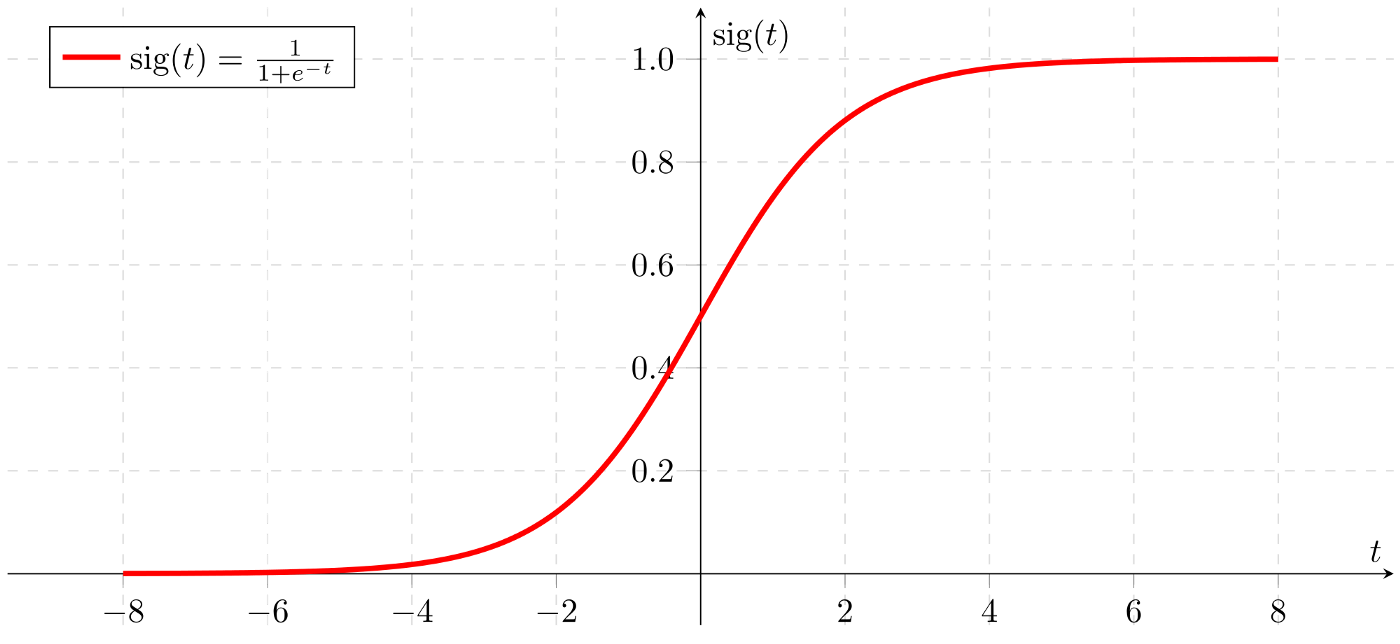

`We selected the Iris dataset to study logistic regression`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sn

In [2]:
data = pd.read_csv("Datasets/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data = data[:100]
len(data)
# Since it is a logistic regression, we will consider it only for 2 classes.

100

D:\IT\Python\Vir3\bir\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


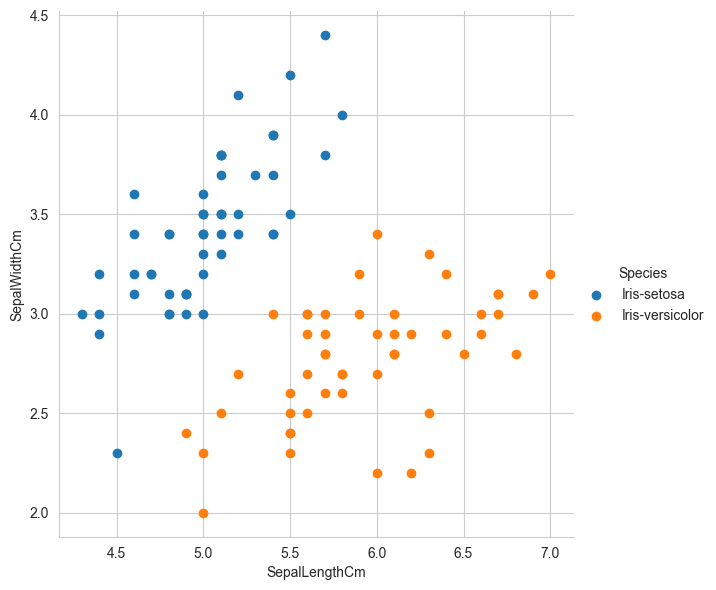

In [4]:
sn.set_style("whitegrid")

sn.FacetGrid(data, hue ="Species",
              height = 6).map(plt.scatter,
                              'SepalLengthCm',
                              'SepalWidthCm').add_legend()

# we got SepalLengthCm and SepalWidthCm columns so we can look at the data.

In [5]:
x = data[["SepalLengthCm", "SepalWidthCm"]].to_numpy()
y = data[["Species"]].to_numpy()


In [6]:
x = [x[i] for i in range(100)]
y = [y[i] for i in range(100)]
# We are taking Iris-setosa and Iris-versicolor classes

In [7]:
x

[array([5.1, 3.5]),
 array([4.9, 3. ]),
 array([4.7, 3.2]),
 array([4.6, 3.1]),
 array([5. , 3.6]),
 array([5.4, 3.9]),
 array([4.6, 3.4]),
 array([5. , 3.4]),
 array([4.4, 2.9]),
 array([4.9, 3.1]),
 array([5.4, 3.7]),
 array([4.8, 3.4]),
 array([4.8, 3. ]),
 array([4.3, 3. ]),
 array([5.8, 4. ]),
 array([5.7, 4.4]),
 array([5.4, 3.9]),
 array([5.1, 3.5]),
 array([5.7, 3.8]),
 array([5.1, 3.8]),
 array([5.4, 3.4]),
 array([5.1, 3.7]),
 array([4.6, 3.6]),
 array([5.1, 3.3]),
 array([4.8, 3.4]),
 array([5., 3.]),
 array([5. , 3.4]),
 array([5.2, 3.5]),
 array([5.2, 3.4]),
 array([4.7, 3.2]),
 array([4.8, 3.1]),
 array([5.4, 3.4]),
 array([5.2, 4.1]),
 array([5.5, 4.2]),
 array([4.9, 3.1]),
 array([5. , 3.2]),
 array([5.5, 3.5]),
 array([4.9, 3.1]),
 array([4.4, 3. ]),
 array([5.1, 3.4]),
 array([5. , 3.5]),
 array([4.5, 2.3]),
 array([4.4, 3.2]),
 array([5. , 3.5]),
 array([5.1, 3.8]),
 array([4.8, 3. ]),
 array([5.1, 3.8]),
 array([4.6, 3.2]),
 array([5.3, 3.7]),
 array([5. , 3.3]),
 a

In [8]:
y

[array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], d

In [9]:
x = np.array(x)
y = np.array(y)

In [10]:
x

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [11]:
y = np.where(y == 'Iris-setosa', 0, 1)  # We can decode the classes (y values)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [12]:
y = y.reshape(100)

In [13]:
# Initialize weights as 0
weights = np.zeros(x.shape[1])
weights

array([0., 0.])

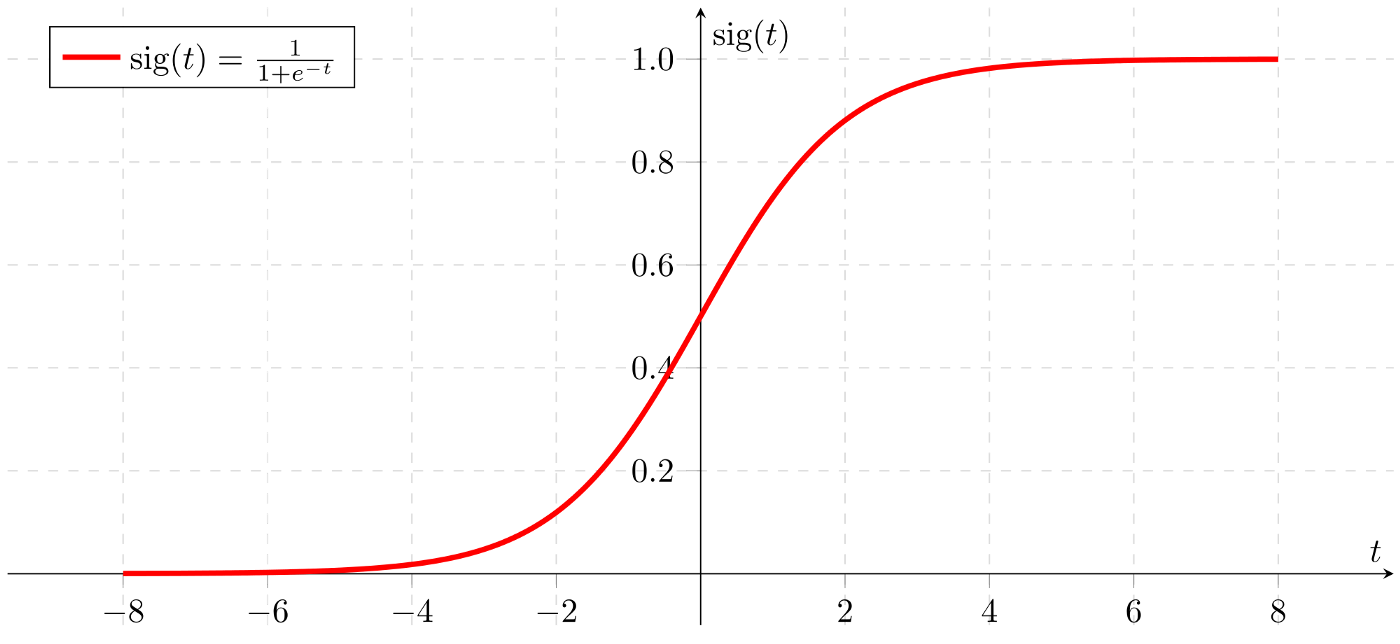

In [14]:
# Sigmoid function
def sigmoid(t):
    return 1 / (1 + np.exp(-t))


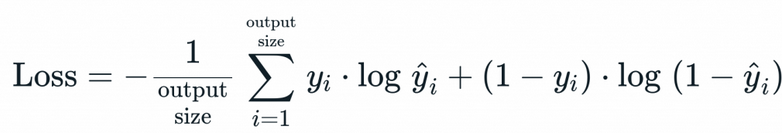

In [15]:
# loss function

def cost_function(weight, x, y):
    
    h = sigmoid(np.dot(x, weight))
    
    loss = -1/len(y) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    return loss


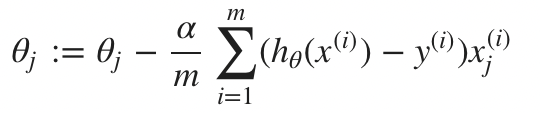

In [16]:
# We use the gradient descent method to adjust the weights

def gradient_descent(weight, x, y, learning_rate, num_iters):
    
    losses = []
    
    for i in range(num_iters):
        
        h = sigmoid(np.dot(x, weight))
        
        weight -= learning_rate * 1/len(y) * np.dot(x.T, h - y)
        
        losses.append(cost_function(weight, x, y))
    
    return weight, losses


In [17]:
# train
weights, losses = gradient_descent(weights, x, y, learning_rate=0.01, num_iters=1000)


In [18]:
weights

array([ 0.89781866, -1.56607121])

In [19]:
losses

[0.6923520096418682,
 0.6915852242371411,
 0.6908416485933839,
 0.690117085586553,
 0.6894081318362415,
 0.6887120276465006,
 0.6880265352560915,
 0.6873498400839505,
 0.686680470642476,
 0.6860172335989821,
 0.6853591611252489,
 0.6847054682126924,
 0.6840555180682261,
 0.6834087940616054,
 0.6827648769840008,
 0.682123426612128,
 0.681484166762574,
 0.680846873175353,
 0.6802113636908987,
 0.6795774902861926,
 0.6789451326179973,
 0.6783141927878559,
 0.6776845910975595,
 0.6770562626076079,
 0.6764291543466746,
 0.675803223048894,
 0.675178433319083,
 0.6745547561449458,
 0.6739321676906144,
 0.6733106483183111,
 0.6726901817949867,
 0.6720707546489524,
 0.6714523556481404,
 0.6708349753769958,
 0.6702186058933504,
 0.6696032404501565,
 0.66898887326982,
 0.66837549936119,
 0.6677631143711372,
 0.6671517144641916,
 0.6665412962249248,
 0.6659318565787884,
 0.6653233927279131,
 0.6647159020990442,
 0.664109382301321,
 0.6635038310920329,
 0.6628992463488548,
 0.6622956260473296,
 0.6

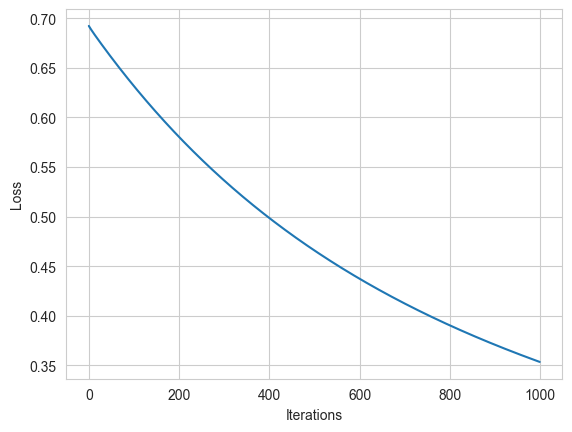

In [20]:
# we will see the losses
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Evaluate

In [21]:
s = []
t=0
for i in range(len(x)):
    
    t = weights[0]*x[i][0] + weights[1]*x[i][1] 
    si = sigmoid(t)
    #print(x1[i],x2[i],x3[i],x4[i])
    s.append(si)
    t=0
    

In [22]:
s

[0.2885628689369311,
 0.42582587123699456,
 0.311808017305248,
 0.32632479383955,
 0.2407150876226193,
 0.22106738772402781,
 0.2324236298896191,
 0.3024730815868502,
 0.3563585546625833,
 0.38805167671313995,
 0.27964106913601317,
 0.26598050914563565,
 0.40403412496495467,
 0.3020418845902101,
 0.25789530619972806,
 0.14515140927069686,
 0.22106738772402781,
 0.2885628689369311,
 0.302904627009705,
 0.2022653722094354,
 0.3830975254170612,
 0.2287137567958632,
 0.1812516278320309,
 0.3568276511030914,
 0.26598050914563565,
 0.4479096098211116,
 0.3024730815868502,
 0.307338387171267,
 0.3416420819217862,
 0.311808017305248,
 0.3669575779099379,
 0.3830975254170612,
 0.14776552928797795,
 0.16253359143859694,
 0.38805167671313995,
 0.3723064937970333,
 0.3674326616953604,
 0.38805167671313995,
 0.3212983443368117,
 0.32174435935806883,
 0.27048644960200685,
 0.6078348541903702,
 0.2571134771541511,
 0.27048644960200685,
 0.2022653722094354,
 0.40403412496495467,
 0.2022653722094354,
 

In [23]:
s1 = 0
s2 = 0

for i in range(len(s)):
    if s[i]<=0.5 and i<50:
        s1+=1
    elif s[i]>0.5 and i>=50:
        s2+=1

In [24]:
s1+s2

99

### 99  % accuracy

# Predict

In [25]:
pred = weights[0]*x[0][0] + weights[1]*x[0][1] 
# Let's give the 1st element in the data, its class=Iris setosa

In [26]:
si = sigmoid(pred)

In [27]:
if si<0.5:
    print("Iris setosa")
else:
    print("Iris-versicolor")
# We predicted correctly 😁 

Iris setosa


## We see the values in the plot

In [28]:
k = np.array([i for i in range(50)])
k.reshape(50)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

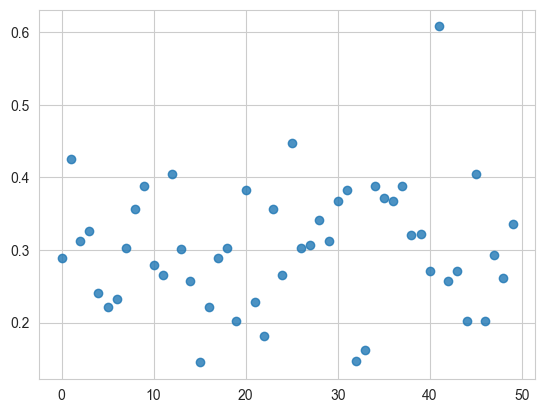

In [29]:
plt.scatter(k, s[:50], alpha=0.8)
plt.show()
# If we notice that 1 data in Iris-Setos is higher than 0.5, this is an error

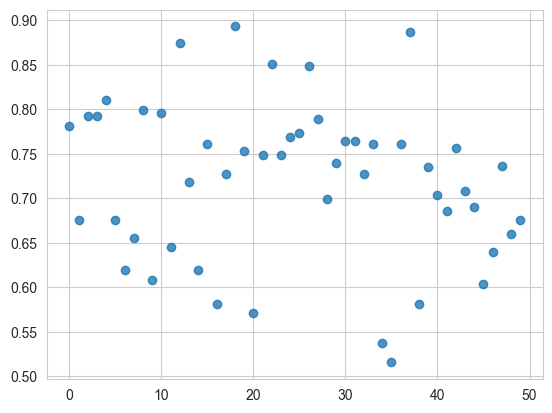

In [30]:
plt.scatter(k, s[50:], alpha=0.8)
plt.show()
# If we notice that from the Iris-versicolor data, all values are greater than 0.5, this is true

# <center> Implementation Sklearn

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
x

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [33]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
clf = LogisticRegression(random_state=0)

In [35]:
clf.fit(x,y)

LogisticRegression(random_state=0)

In [36]:
clf.score(x,y)
# 100  accuracy

1.0

In [37]:
clf.predict([[5.1, 3.5]])
# He predicted correctly

array([0])

# <center> <h1> 👨‍💻   🚀  